In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 12

In [6]:
df = pd.read_csv('../Data/Marketing_Data.csv')
x = df.drop('sales', axis='columns')
y = df['sales']
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


<function matplotlib.pyplot.show(close=None, block=None)>

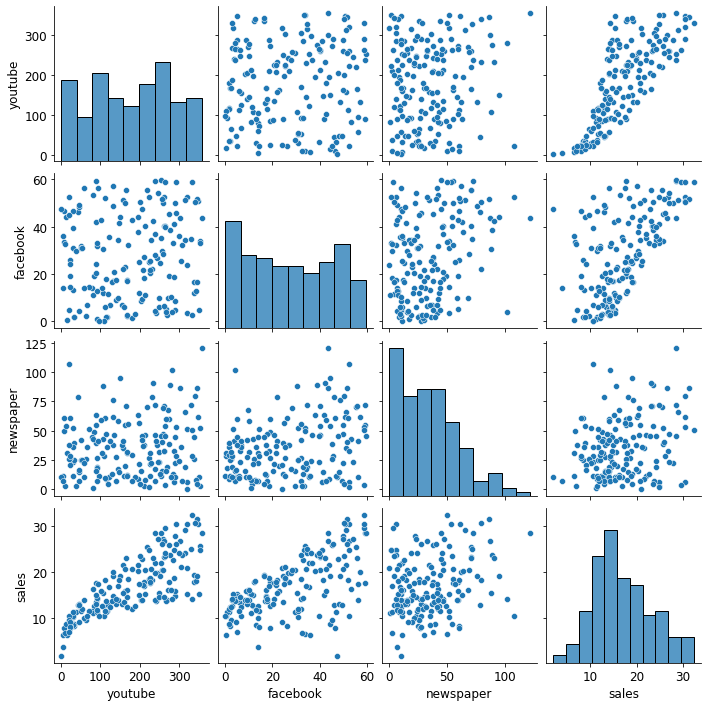

In [7]:
#Biểu đồ phân tán
sns.pairplot(df)
plt.show

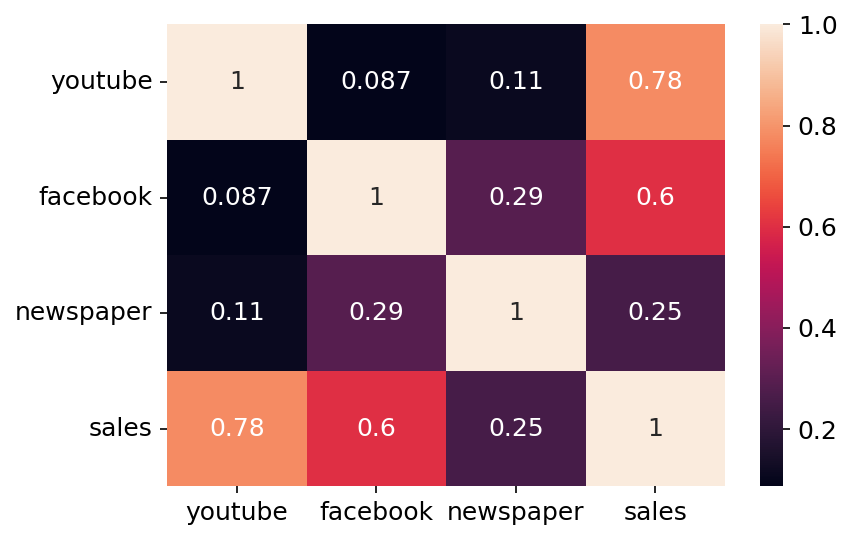

In [8]:
#Biểu đồ heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
x=df[["youtube","facebook","newspaper"]]
y=df[['sales']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
sales_train,sale_test =y_train['sales'], y_test['sales']
youtube_train, youtube_test = x_train['youtube'], x_test['youtube']
facebook_train, facebook_test = x_train['facebook'], x_test['facebook']
sales_train, youtube_train, facebook_train = np.array(sales_train), np.array(youtube_train), np.array(facebook_train)
youtube_train = sms.add_constant(youtube_train)
facebook_train = sms.add_constant(facebook_train)
multi_train=x_train.drop(columns=['newspaper'])
multi_train=sms.add_constant((np.array(multi_train)))
multi_test=x_test.drop(columns=['newspaper'])
multi_test=sms.add_constant((np.array(multi_test)))
youtube_test = sms.add_constant(youtube_test)
facebook_test = sms.add_constant(facebook_test)
sale_test=sms.add_constant(np.array(y_test))

In [10]:
#Xây dựng model với biến độc lập là youtube
single_model_1 = sms.OLS(sales_train, youtube_train)
results1 = single_model_1.fit()


In [11]:
#Kết quả model
R_square1 = results1.rsquared
params = results1.params
print(results1.summary())
print(params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     208.1
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           4.70e-29
Time:                        11:40:52   Log-Likelihood:                -380.18
No. Observations:                 136   AIC:                             764.4
Df Residuals:                     134   BIC:                             770.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3196      0.688     12.088      0.0

In [12]:
#Kiểm định mô hình với mức ý nghĩa 5%
pre_values1 = params[0] + params[1] * youtube_test
alpha = .5
predict_youtube = results1.get_prediction(youtube_test).summary_frame(alpha)
print(predict_youtube.head())
predict_value_series=results1.predict(youtube_test)

          mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
59   13.390787  0.421206      13.105915      13.675659     10.677034   
155  22.895636  0.536534      22.532764      23.258508     20.172590   
69   24.957413  0.653018      24.515761      25.399065     22.222754   
164  17.899129  0.348646      17.663331      18.134927     15.190088   
100  11.742514  0.496592      11.406657      12.078372      9.022936   

     obs_ci_upper  
59      16.104540  
155     25.618682  
69      27.692072  
164     20.608171  
100     14.462092  


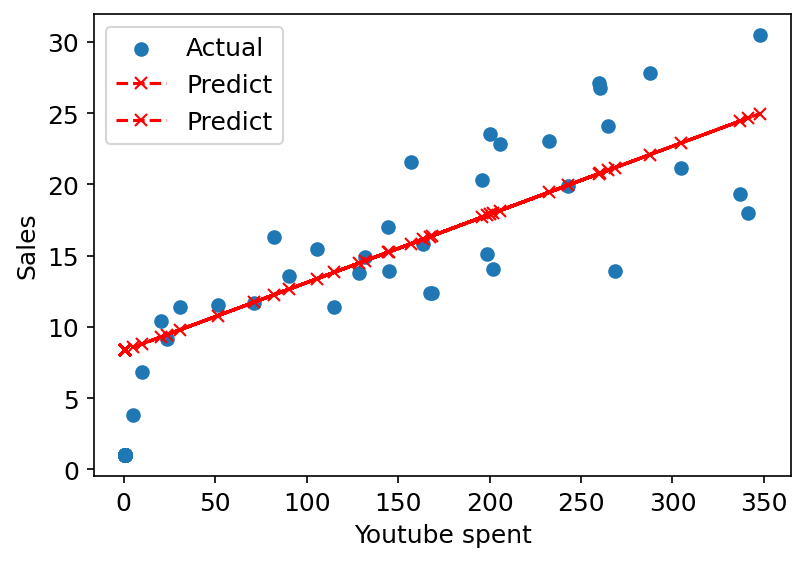

In [13]:
# Trực quan hóa
plt.scatter(youtube_test, sale_test, label='Actual')
plt.plot(youtube_test, pre_values1, color='red', linestyle='--', marker='x', label='Predict')
plt.xlabel("Youtube spent")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [14]:
#Xây dựng model với biến độc lập là facebook
single_model_2 = sms.OLS(sales_train, facebook_train)
results2 = single_model_2.fit()


In [15]:
#Kết quả mô hình
R_square2 = results2.rsquared
params2 = results2.params
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     78.87
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           3.80e-15
Time:                        11:40:52   Log-Likelihood:                -412.43
No. Observations:                 136   AIC:                             828.9
Df Residuals:                     134   BIC:                             834.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0880      0.788     14.065      0.0

In [16]:
#Kiểm định mô hình với mức ý nghĩa 5%
pre_values2 = params2[0] + params2[1] * facebook_test
alpha = .5
predict_facebook = results2.get_prediction(facebook_test).summary_frame(alpha)

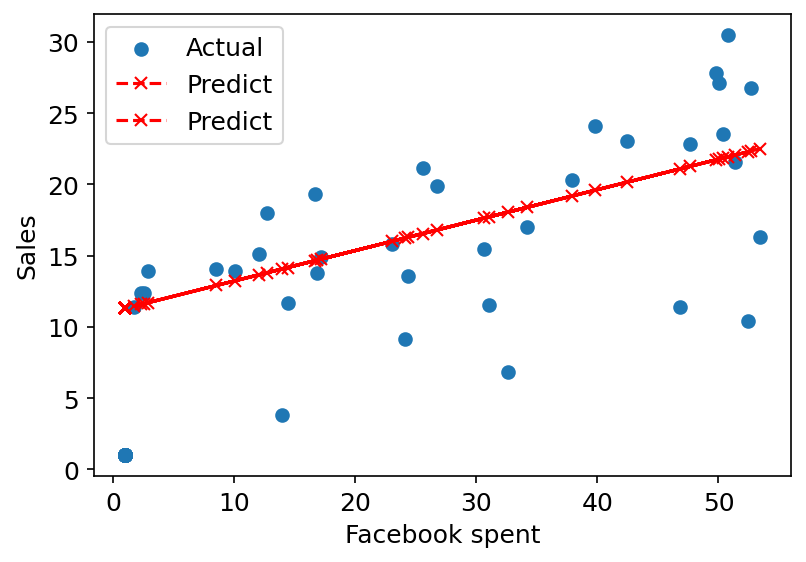

In [17]:
# Trực quan hóa
plt.scatter(facebook_test, sale_test,label='Actual')
plt.plot(facebook_test, pre_values2, color='red', linestyle='--', marker='x', label='Predict')
plt.xlabel("Facebook spent")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [18]:
#Mô hình hồi quy đa biến
multi_model_1=sms.OLS(sales_train,multi_train)
results3=multi_model_1.fit()

In [19]:
#Kết quả mô hình
R_square3 = results3.rsquared
params3 = results3.params
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     573.5
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           4.05e-66
Time:                        11:40:53   Log-Likelihood:                -289.94
No. Observations:                 136   AIC:                             585.9
Df Residuals:                     133   BIC:                             594.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7136      0.429      8.653      0.0

In [20]:
#Dự đoán với test data
predict_multi=results3.predict(multi_test)

float64


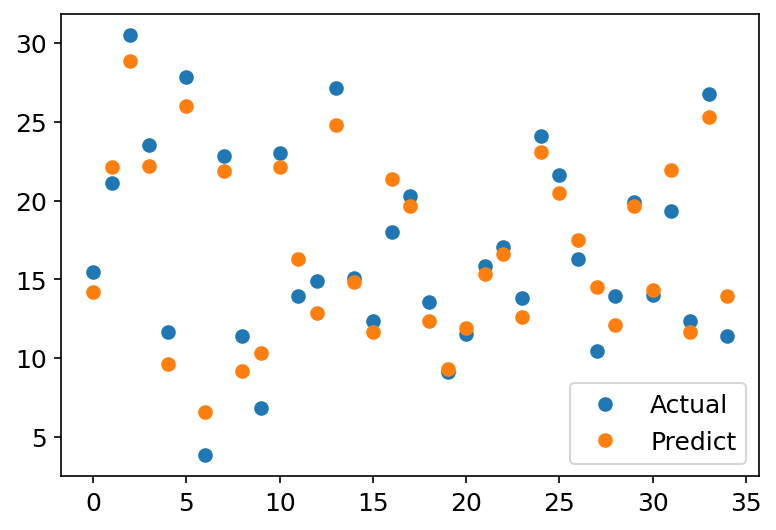

In [21]:
#Trực quan hóa
sale_test_viz=np.delete(sale_test,0,1)
fig, ax = plt.subplots()
ax.plot(sale_test_viz, "o", label="Actual")
ax.plot(predict_multi,"o", label="Predict")
ax.legend(loc="best")
print(sale_test.dtype)

In [22]:
# save model
import pickle
with open('./models/model_Linear_SingVariable_Youtube', 'wb') as y:
    pickle.dump(single_model_1, y)
with open('./models/model_Linear_SingVariable_Facebook', 'wb') as f:
    pickle.dump(single_model_2, f)
with open('./models/model_Linear_MultipleVariables', 'wb') as m:
    pickle.dump(multi_model_1, m)